<a href="https://colab.research.google.com/github/nicsim22/DS110-Content/blob/main/Lecture22ScikitLearn_nosol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Supervised Machine Learning

*Some of Cynthia's colleagues had begun to create deep machine learning models to predict where the virus would strike next.  But they were having little luck, because there were only so many cities they could use as datapoints.  "We need more data!" one of these researchers would say to Aubin, and he would simply shrug.  "If all the data in the world is not enough, maybe you need to change your approach."*

*Cynthia realized they were overthinking it.  They didn't need "deep" models hungry for unlimited data.  They just needed a program that could say, "**This** city is similar to **that** one that got infected, so it might be in trouble."*

Supervised machine learning generally accomplishes one of two kinds of tasks.



* **Classification**.  Once fully trained, the learning algorithm can **identify categories** of things.

For images, this could be faces versus not faces, or what kind of animal, or what letter was handwritten.  For audio, it could classify the word that was spoken.  For emails, it could decide what is spam.



* **Regression**.  Regression attempts to **fit a function (typically with numerical output) to some data**.  Prediction of prices of apartments given their attributes, or predicting the degree to which one player has the advantage in a game - these are regression problems.



Both of these fall under supervised machine learning because of the way the learning works:  the learner has many "labeled examples" that are inputs labeled with the correct output.  The learner has **"the answers" for all the training data**, and it just needs to **find a function that interpolates and extrapolates reasonably from there**.


Depending on the learning algorithm and how much data there is to process, *training*, or building the function that classifies or interpolates, could take a long time.  But here we're going to present an algorithm that takes basically no time to train: **k-nearest neighbors memorizes all training examples.**

# Sample problem:  digits

Our dataset that we will try to learn from will be a relatively simple one:  the digits library of scikit-learn.  It's grayscale instead of color, and relatively low resolution, and there's nothing in the image besides the digit to cause confusion, so this would be considered a relatively easy dataset to learn from.

The data consists of 8x8=64 brightness values, labeled with the correct digit.  The task is classification:  presented with a new digit, a trained learner should be able to produce a correct classification.

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
print(digits.data.shape) # Examples x 64 pixels each for each 1786 digit

(1797, 64)


<Figure size 640x480 with 0 Axes>

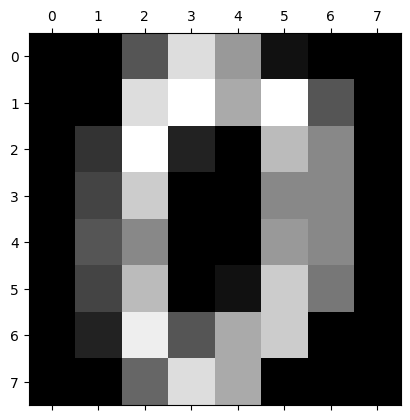

In [ ]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0]) # Notice images[0] is 2D

# k-nearest neighbors

The k-nearest neighbors strategy is most easily pictured in two dimensions, even though we're dealing with 64 dimensions here.  Images representing the same digit should tend to cluster near each other with similar values.


<img src=" 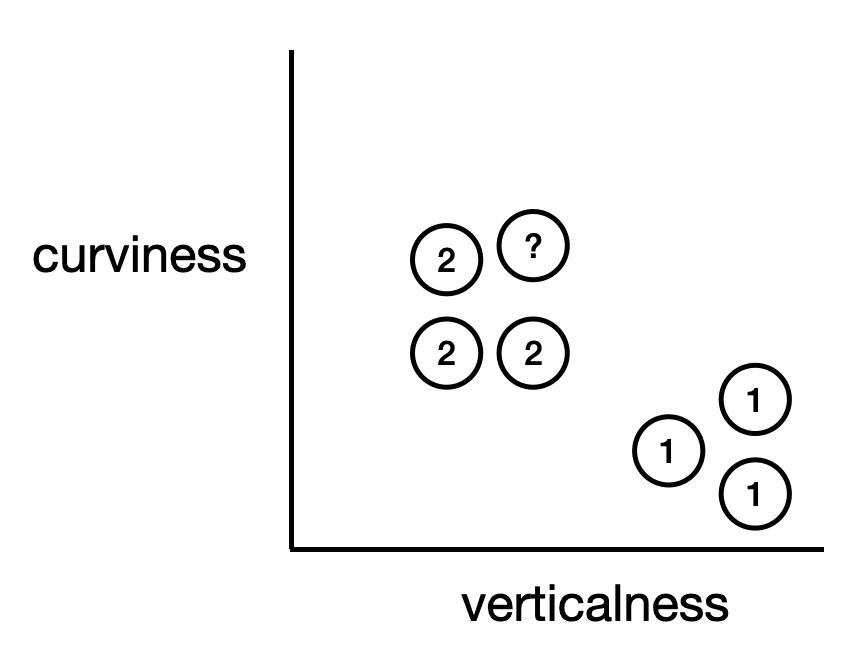">


To find the correct classification of a point, we consult its neighbors - the *k* (let's say 3) closest examples that it does have a label for.  If they all agree on their own classification, then this is a very good guess for the new point.  But if they disagree, then the must vote, and majority rule determines the label.


//k usually odd so that when we vote, wont have a tie//


(What does closest mean?  We typically use Euclidean distance between the data vectors. Letting $\Delta x_i$ be a difference in a particular vector element $i$, such as the difference at one pixel, the distance is $\sqrt{\Delta x_1^2 + \Delta x_2^2 + \ldots + \Delta x_n^2}$.)

//lowkey like difference in two squares concept//


Let's see how to train on all the digits data available for scikit-learn.

In [ ]:
# Suppress FutureWarnings, which would otherwise repeatedly warn us that SciPy
# is changing soon
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# "Fit" is the name of all training methods in scikit-learn;
# neighbors doesn't fit so much as store for efficient retrieval
nbrs = KNeighborsClassifier(n_neighbors=3).fit(digits.data, digits.target) #create KNeighborsClassifier object, with neighbors being 3 --> .fit help ingest data
#data = 64 values

nbrs.score(digits.data, digits.target) # Find accuracy on the training dataset --> how well it classifies the stuff that we pass in

0.993322203672788

# The train/test split and overfitting

The previous results of 99% accuracy were a little too good to be true.  We used k-nearest neighbors where one "neighbor" was always the original, labeled point itself.  (Reducing k to 1 thus would do what? --> //accuracy will be 100% bc we trained using the data which it memorised and tested it with the same set of data//) It seems like cheating to be given the answers ahead of time in this way.


In general, most classifiers have this issue - **you shouldn't evaluate solely on your training data**, or the results won't give a sense of how well you do on genuinely new data points.  In fact, many algorithms run the risk of getting too cozy with the training data and *overfitting* to its idiosyncracies, learning rules that only happen to be true of the training data in particular. You can't tell whether that has happened if you just evaluate on the training data.



So, at the very least, importantly in machine learning, you must ***split the data into training and testing data***.  It's best to do this blindly and randomly, because the distributions of training and testing data should match.

# Thought questions

* What would be the disadvantage of having too little training data and too much test data?

//algorithm has less stuff to learn from when we have too little training data//


* What would be the disadvantage of having too little *test* data and too much training data?

//some cases that we are not testing on at all, we will miss some cases to represent, les credible results//


You're allowed to use a much larger portion of training data for training - somewhere between **5% and 20%** of your data should be **reserved for testing**.

**Scikit-learn's train_test_split() function** performs exactly this task of separating out randomly selected examples for testing.

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(digits.data, digits.target, test_size=0.2) #optional parameter of 20% of data gg into test set
nbrs = KNeighborsClassifier(n_neighbors=3).fit(data_train, label_train)

nbrs.score(data_test,label_test)

0.9861111111111112

It turns out, on this dataset, K-nearest neighbors will still do great - still roughly 99% accuracy when the training data is separated from the test data.

[2 6 7]


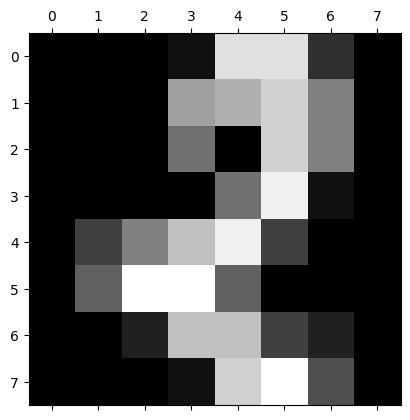

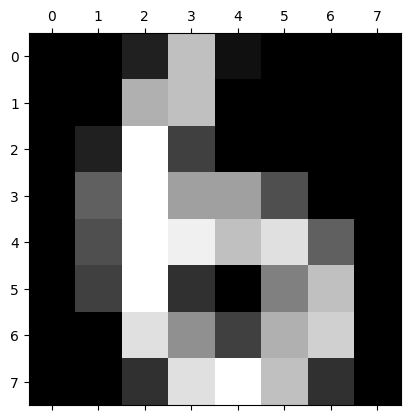

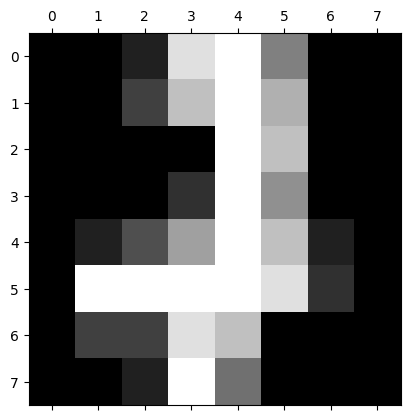

In [ ]:
print(nbrs.predict(data_test[0:3]))
def reshape_and_show(num, data_test):
    image = data_test[num].reshape(8,8)
    plt.matshow(image) #takes a matrix and renders it light and dark values

reshape_and_show(0,data_test)
reshape_and_show(1,data_test)
reshape_and_show(2,data_test)

But there must be something k-nearest neighbors is bad at, or people wouldn't get so excited about neural networks.  Let's try a harder dataset -- a faces dataset.

The LFW (Labeled Faces in the Wild) dataset is another in scikit-learn.  The faces are labeled with who they are.  We can ask for just the faces supported by at least 100 examples.

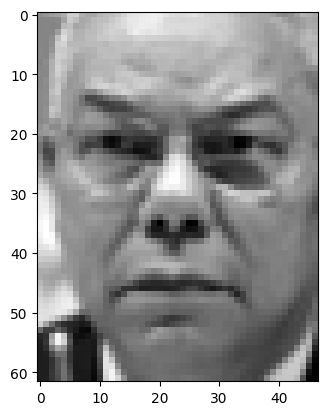

In [ ]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person = 100)

plt.imshow(faces.images[5], cmap="gray") #show image number 5

# Thought questions

* Some machine learning methods (like neural networks) can start to recognize interesting features built from smaller features - like look at a bunch of pixels and say "hey, that's a big nose" (recognise individual patterns then identify something larger) - and then react to the presence or absence of the bigger, composite feature.  Can k-nearest-neighbors do that?

//No, k-nearest neighbours only find close vectors, no hierarchal processing//

* Some machine learning methods (convolutional neural networks) are "translation invariant" - if you shift every pixel over, the target will still be recognized, even with no training examples in that location.  Are k-NNs working with images translation invariant?

//if moved to right by one pixel in test data --> would not be considered as close to training data, not counted as nearest neighbors//

In [ ]:
data_train, data_test, label_train, label_test = train_test_split(faces.data, faces.target, test_size=0.2) #separate images into training and testing images
nbrs = KNeighborsClassifier(n_neighbors=3).fit(data_train, label_train)

nbrs.score(data_test,label_test)


0.5701754385964912

Better than chance, as there are 5 people in the data and chance would be 0.2, but clearly there's room for improvement.


# A note about randomness

It's nice to make experiments *repeatable* so that when someone else runs code, they get the same result as you.  But train_test_split() and some machine learning models make use of ***randomness***, so someone rerunning the experiment code may get different results.  **How can a random experiment be repeatable?**

//Computers do not generate truly random numbers. RNG starts its life with a seed, which can be any value. Since we are DS110, the value we will be using for examples will be 110 for consistency. Seed will produce random number as a result of a secret function (e.g. seed 110 put into function which produces 8). 8 then becomes the seed that the function uses to produce another value, e.g. 2. 2 becomes new seed... secret seed doing some deterministic computation to provide a value. if no initial seed is provided, seed usually takes time of computer --> sequence of numbers depends on time, run at 12pm diff from run at 12.01pm.

thus if you want consistency in randomness to produce the same results, set the same starting seed to get 8 and 2 again//

----------------

There is a trick that allows an experiment involving randomness to be repeated *exactly*:  **setting the *seed* of the random number generator (rng)**.  Random numbers generated on a computer aren't truly random - they're just produced by a function being called on an initial value called a *seed*, and then a function being called on that value, and so on.  If the seed is set to the same value the second time an experiment is run, the random results will all be the same as last time -- and train_test_split() will produce the same split, for example.

In [ ]:
import random

random.seed(110)  # Set seed - comment this out to get different rolls --> if set seed, ALWAYS gets same number of 7
print(random.randint(1,8))  # Normally produces random integer 1-8
#if print(random.randint(1,8)) again, another number is generated, but when ran, always still gives same number

#setting seed means that we will go through same sequence of output every time

7


train_test_split() and most machine learning methods have some argument that sets the seed of the random number generator before running them, ensuring the experiment is repeatable exactly.

Don't treat the seed as an interesting parameter to vary, though.  Trying different seeds is like rolling the dice until you get results you want - it's unlikely to reflect real-world performance.

In [ ]:
# Try getting different results with different seeds!
# Going back to the same seed gives the same result.
data_train, data_test, label_train, label_test = train_test_split(faces.data,
                                                                  faces.target, test_size=0.2,
                                                                  random_state=110) # Set the seed so that same random outputs are generated each time ran
nbrs = KNeighborsClassifier(n_neighbors=3).fit(data_train, label_train)

nbrs.score(data_test,label_test) #0.6447368421052632 always obtained when ran

0.6447368421052632

# Validation data and strategies

Can we go back and change our choice of k?  You shouldn't, **because once you've looked at the test data, any changes you make could start creating improvement that doesn't carry over to the real world**.  Your choices from here on out could cause *overfitting* to the test data.

It's probably not as bad as overfitting to the training data, because the overfitting is indirect - you're changing parameters rather than telling the answers directly.  Still, expect a performance drop on moving to the "real world" if you went back and forth trying to get the best test score possible.

//training data --> validation data --> test data (dont touch until 100% sure)//


A way to avoid this problem is to split the training data yet again, splitting off a portion of the training data to be "**validation data**."  Now you can go back and forth trying to improve your performance without worrying that test set knowledge is leaking into your decisions.


A still more clever idea is to rotate which fraction of your training data is the validation set.  So you train on the first 80% then test on 20%, then train on the first 60% and last 20% while training on that missing 20%, and so on 5 times (for example).  Ideally, this is still **separate from the test data**, which is reserved for final testing.  This is called "**cross-validation**." Test data is "locked up" until you are ready to test the final.

An extreme version in which just 1 example is left out every time is called "**leave-one-out-cross-validation**," or LOOCV for short.  This ideally gives a more accurate view of the algorithm under different circumstances, and is less dependent on which data is validation data.

Scikit-learn similarly has a function for cross-validation.

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(nbrs, data_train, label_train) #does cross-validation process, alternates which slice it uses for cross-validation

array([0.6010929 , 0.6010929 , 0.62637363, 0.5989011 , 0.52197802])

Some part of machine learning is just trying different parameters to see what works best - although as we'll discover, we don't expect k-nearest neighbors to work that well regardless of parameters.

In [ ]:
import numpy as np

for i in range(1,10):
  nbrs = KNeighborsClassifier(n_neighbors=i) #diff values of k from 1-9
  print(np.mean(cross_val_score(nbrs, data_train, label_train)))

0.5745331171560679
0.5855101182970035
0.5898877079204948
0.6052543085329971
0.6107247943313517
0.6162253047498949
0.6206269140695371
0.6107488140275026
0.6205968894493484


# Other notes on k-nearest neighbors

k-NN classifiers are easy and quick to train on a variety of data, not just numerical data.  If you have boolean features, you can turn them into 0's and 1's.  If you have "categorical" features (things that can take discrete, specific values) that can take on multiple different values, like state="MA" versus "CA", you can also change those into a bunch of booleans (MA=0 or 1, CA=0 or 1).  Changing a categorical value into many boolean values like this is called "one-hot encoding."

One important note if you use these for a final project:  if your features are of very different magnitudes from each other, you probably need to **scale them before running k-NN** (divide by their max, or their standard deviation).  If one feature is a population that ranges from 10,000 to 1,000,000, and another is a boolean 0 or 1, that 0 or 1 is not going to contribute much to the distance and will basically get ignored.